In [1]:
import pandas
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = {'CGPA':['g9','g8','g9','l8','g8','g9','l8','g9','g8','g8'],
 'Inter':['Y','N','N','N','Y','Y','Y','N','Y','Y'],
 'PK':['+++','+','==','==','+','+','+','+++','+','=='],
 'CS':['G','M','P','G','M','M','P','G','G','G'],
 'Job':['Y','Y','N','N','Y','Y','N','Y','Y','Y']}
table=pandas.DataFrame(data,columns=["CGPA","Inter","PK","CS","Job"])
table.where(table["CGPA"]=="g9").count()
encoder=LabelEncoder()

In [3]:
table

,CGPA,Inter,PK,CS,Job
0,g9,Y,+++,G,Y
1,g8,N,+,M,Y
2,g9,N,==,P,N
3,l8,N,==,G,N
4,g8,Y,+,M,Y
5,g9,Y,+,M,Y
6,l8,Y,+,P,N
7,g9,N,+++,G,Y
8,g8,Y,+,G,Y
9,g8,Y,==,G,Y


In [4]:
for i in table:
 table[i]=encoder.fit_transform(table[i])
table

,CGPA,Inter,PK,CS,Job
0,1,1,1,0,1
1,0,0,0,1,1
2,1,0,2,2,0
3,2,0,2,0,0
4,0,1,0,1,1
5,1,1,0,1,1
6,2,1,0,2,0
7,1,0,1,0,1
8,0,1,0,0,1
9,0,1,2,0,1


In [5]:
X=table.iloc[:,0:4].values
y=table.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
y_test

array([0, 1, 1, 1])

In [6]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print([1,0,0,1])

Accuracy: 0.75
[[0 1]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

[1, 0, 0, 1]


/home/machine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
if model.predict([[1,0,0,1]])==1:
 print("Got JOB")
else:
 print("Didn’t get JOB")
 print([2,0,2,0])
if model.predict([[2,0,2,0]])==1:
 print("Got JOB")
else:
 print("Didn’t get JOB")

Got JOB
Didn’t get JOB


In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

In [15]:
df = pd.read_csv('car_evaluation.csv', header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
le = preprocessing.LabelEncoder()
dataset = df.apply(le.fit_transform)

In [ ]:
X= dataset.iloc[: , : -1].values
y= dataset.iloc[ : , -1].values

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state=2)
model=DecisionTreeClassifier(criterion='entropy', max_depth=3) 
model = model.fit(X_train,y_train)

In [19]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = clf.fit(X, y)

In [21]:
import numpy as np
feature_names= ['Buying', 'Maintenance', 'Doors', 'Persons', 'Luggage_Boot', 'Safety']
target_names= np.array(['unacc', 'acc', 'good', 'vgood'])

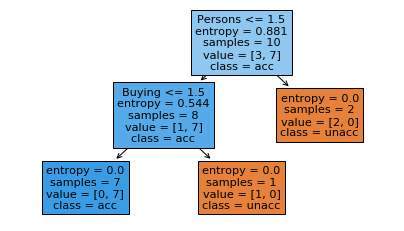

In [24]:

fig = plt.figure(figsize=(7,4))
decistion_tree = tree.plot_tree(clf,feature_names=feature_names, class_names=target_names,filled=True)
plt.show()
